In [1]:
import os
import pandas as pd

path = os.getcwd()

train_data = pd.read_csv("../../datasets/train.csv", index_col = 0, encoding = 'utf-8')

train_data.dropna(inplace = True)
train_data.drop(['감정_소분류','시스템문장1','시스템문장2','시스템문장3', '사람문장2', '사람문장3', '신체질환'], axis=1, inplace=True)
train_data.rename({'사람문장1':'text', '감정_대분류':'label'}, axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['label'] = label_encoder.fit_transform(train_data['label'])

X_train = train_data['text']
y_train = train_data['label']

X_train[5:10], y_train[5:10], y_train.value_counts()

(310    프리랜서로 일하면서 요즘 일이 없는데 가족들은 내가 열심히 하지 않은 탓이라고 해서...
 311     오늘 은퇴하고 왔는데 가족들이 그동안 고생했다며 나를 격려해주지 않아서 마음이 아팠어.
 312               앞으로 노후를 위해 준비할 것들이 많은데 의지할 사람은 없고 막막해.
 313         얼마 전 은행 계좌를 봤는데 생각보다 모아 둔 돈이 없더라고. 너무 충격이었어.
 314     그동안 담배를 너무 많이 피웠나 봐. 이제 와서 내가 모은 돈을 보니 너무 후회가 돼.
 Name: text, dtype: object,
 310    4
 311    4
 312    4
 313    4
 314    5
 Name: label, dtype: int32,
 label
 2    7679
 4    7671
 3    7661
 5    7564
 1    7424
 0    4695
 Name: count, dtype: int64)

In [1]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
model = BertModel.from_pretrained("bert-base-multilingual-uncased")

In [2]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(105879, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [4]:
text = list(X_train)[:3]
encoded_input = tokenizer.batch_encode_plus(text, return_tensors='pt', padding=True)
output = model(**encoded_input)

In [5]:
# model input
print(encoded_input.keys())
print(encoded_input['input_ids'].shape)
print(encoded_input['token_type_ids'])
print(encoded_input['attention_mask'])

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
torch.Size([3, 57])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
# model output
print(output.keys())
print()
print(output[0].shape, output[1].shape)
print()
print(output)

odict_keys(['last_hidden_state', 'pooler_output'])

torch.Size([3, 57, 768]) torch.Size([3, 768])

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.0037, -0.0404, -0.0327,  ...,  0.0434, -0.0628, -0.0862],
         [ 0.5168,  0.3739,  0.2457,  ...,  0.1119,  0.1012, -0.8759],
         [ 0.3544, -0.6516,  0.8071,  ...,  0.7136, -0.8563, -1.6121],
         ...,
         [ 0.2260,  0.0299, -0.0703,  ...,  0.0841,  0.2529, -0.6108],
         [ 0.1947,  0.0789,  0.1264,  ..., -0.0850,  0.6725, -0.4889],
         [-0.0216,  0.2420, -0.1911,  ...,  0.2028,  0.3627, -0.3534]],

        [[-0.0385, -0.0905, -0.0602,  ...,  0.0099, -0.0196, -0.1155],
         [ 0.2797,  0.2264,  0.0666,  ..., -0.1723,  0.1159, -0.1690],
         [-0.2982, -0.3840,  0.0470,  ...,  0.4343, -0.1509, -0.9860],
         ...,
         [ 0.2366, -0.1781,  0.3414,  ...,  0.2631,  0.2706, -0.7108],
         [-0.0921,  0.1123, -0.0170,  ...,  0.1551, -0.6323, -0.8247],
         [ 0.1593,  0.3165,

In [7]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device: {device}')

class BERTClassifier(nn.Module):
    def __init__(self, bert, hidden_size=768, num_classes=6, dr_rate=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
        self.classifier = nn.Linear(hidden_size , num_classes)

    # def gen_attention_mask(self, token_ids, valid_length):
    #     attention_mask = torch.zeros_like(token_ids)
    #     for i, v in enumerate(valid_length):
    #         attention_mask[i][:v] = 1
    #     return attention_mask.float()

    def forward(self, encoded_input):
        # attention_mask = self.gen_attention_mask(token_ids, valid_length)
        bert_output = self.bert(**encoded_input)

        # output[0] = last_hidden_states, output[1] = pooler_output
        if self.dr_rate:
            out = self.dropout(bert_output[1])
        else:
            out = bert_output[1]
        return self.classifier(out)
    
bert_clssifier_model = BERTClassifier(model, dr_rate=0.5).to(device)

device: cuda


In [8]:
text = list(X_train)[:3]
encoded_input = tokenizer.batch_encode_plus(text, return_tensors='pt', padding=True).to(device)
output = bert_clssifier_model(encoded_input)
output

tensor([[ 0.0252,  0.2218, -0.3547, -0.0138, -0.0532,  0.2474],
        [-0.0256,  0.2068, -0.0086, -0.2478,  0.0949,  0.1249],
        [ 0.1093,  0.1234, -0.3793, -0.1182,  0.2150,  0.2187]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [9]:
from math import ceil
from torch.optim import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

batch_size = 64
warmup_ratio = 0.1
num_epochs = 3
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

no_decay = ['bias', 'LayerNorm.weight']

# 최적화해야 할 parameter를 optimizer에게 알려야 함
optimizer_grouped_parameters = [
    {'params': [p for n, p in bert_clssifier_model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in bert_clssifier_model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate) # optimizer
loss_fn = nn.CrossEntropyLoss() # loss function 

t_total = ceil(len(X_train) // batch_size) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [10]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.98, random_state=42, stratify=y_train, shuffle=True)

train_acc_list = []
loss_list = []

for epoch in range(num_epochs):
    train_acc = 0.0

    bert_clssifier_model.train()

    epoch_iterator = tqdm(range(ceil(len(X_train) // batch_size)), desc=f"Epoch {epoch+1}")
    for index in epoch_iterator:
        optimizer.zero_grad()
       
        X_batch = tokenizer.batch_encode_plus(list(X_train[index*batch_size:(index+1)*batch_size]), padding='max_length', return_tensors='pt').to(device)
        y_batch = torch.tensor(list(y_train[index*batch_size:(index+1)*batch_size])).to(device)
        outputs = bert_clssifier_model(X_batch)

        loss = loss_fn(outputs, y_batch)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(bert_clssifier_model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()

        _, max_indices = torch.max(outputs, 1)
        batch_accuracy = (max_indices == y_batch).sum().data.cpu().numpy()/max_indices.size()[0]

        train_acc += batch_accuracy
        train_acc_list.append(train_acc/(index+1))
        loss_list.append(loss.item())
        epoch_iterator.set_postfix(loss=loss.item(), acc=train_acc/(index+1))

Epoch 5: 100%|██████████| 426/426 [00:24<00:00, 17.55it/s, acc=0.295, loss=1.84] 


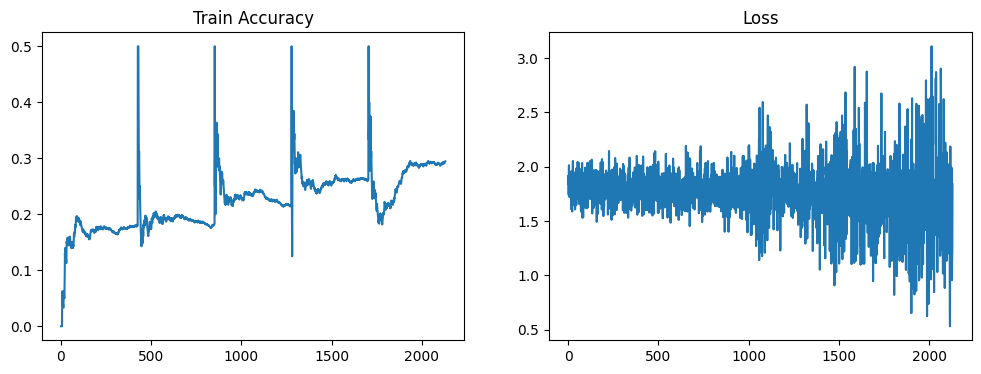

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_list)
plt.title('Train Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss_list)
plt.title('Loss')

plt.show()

0      1.814018
1      1.807001
2      1.793509
3      1.797053
4      1.778596
         ...   
264    1.568290
265    1.429295
266    1.728252
267    1.269500
268    1.227526
Name: Loss, Length: 269, dtype: float64


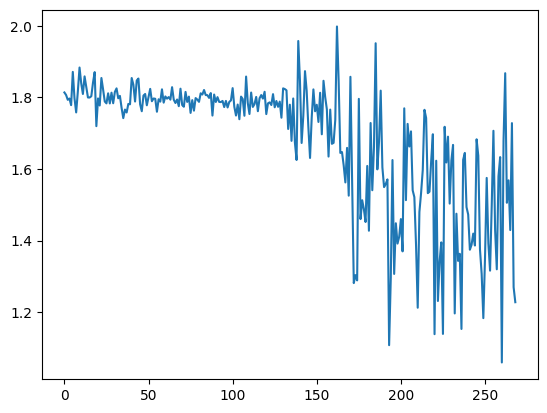

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

log_path = 'log.tsv'

df = pd.read_csv(log_path, delimiter='\t')
plt.plot(df['Loss'])